<a href="https://colab.research.google.com/github/rerebebeccacca/20210624-deep-learning-class/blob/main/03_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

import imgaug.augmenters as iaa
import imgaug as ia

(316, 316, 3)

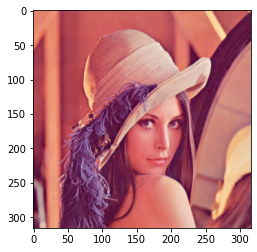

In [ ]:
# Read image
img = io.imread('https://upload.wikimedia.org/wikipedia/zh/3/34/Lenna.jpg')#網路隨意找的圖片
plt.imshow(img)
img.shape

In [ ]:
# augmentation
# 可做隨機的轉換
# mode ref: https://imgaug.readthedocs.io/en/latest/source/api_augmenters_geometric.html
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # 50% horizontal flip
    iaa.Flipud(0.5), # 50% vertical flip
    iaa.Affine(
        rotate=(-10, 10), # random rotate -45 ~ +45 degree
        shear=(-4, 4), # random shear -16 ~ +16 degree
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale x, y: 80%~120%
        mode='edge',#ia.All, 'constant', 'edge
        cval=[255,0,0],
    ),
])

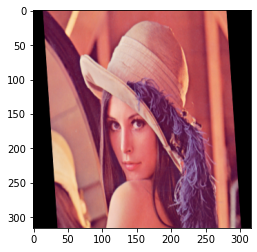

In [ ]:
# Augment 1 image
#每次的轉換都不一樣
img_aug = seq.augment_image(img)
plt.imshow(img_aug)

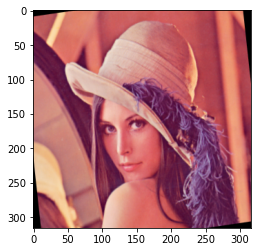

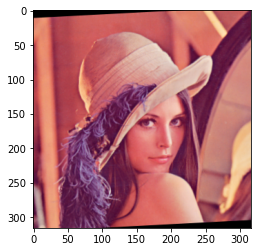

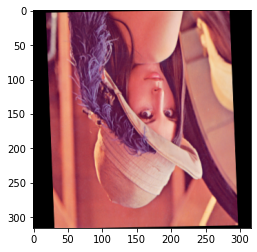

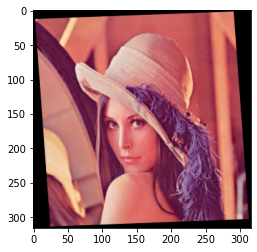

In [ ]:
# Augment images (batch size = 4)
img_batch = np.stack([img]*4) # (4, 60, 184, 3)
img_aug_batch = seq.augment_images(img_batch)

for aug in img_aug_batch:
    plt.imshow(aug)
    plt.show()